In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
ranks = pd.read_pickle("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/GIT/cancer_networks/data/gene_dependency_ranks.pkl")

In [3]:
correlation_matrix = ranks[ranks.columns].corr()


In [4]:
T_Links={}
N=len(correlation_matrix.columns)
Cell=correlation_matrix.columns
ww=open("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/cell_lines_corr.dat","w")

In [5]:
for j in range(N):
    for i in range(j+1,N):
        T_Links[str(j)+","+str(i)]=correlation_matrix[Cell[j]][Cell[i]]
        ww.write(str(j)+"\t"+str(i)+"\t"+str(correlation_matrix[Cell[j]][Cell[i]])+"\n")
ww.close()

In [6]:
def extract_bb(G,alp):
    keep_graph = nx.Graph()
    for i in G:
        neigh=G[i]
        k=len(neigh)
        if k>1:
            W=sum(G.get_edge_data(i,j)['weight'] for j in neigh)
            for j in neigh:
                p=1.0*G.get_edge_data(i,j)['weight']/W
                if (1-p)**(k-1) < alp:
                    keep_graph.add_edge(i,j,G.get_edge_data(i,j))
    return keep_graph, 1.0*len(keep_graph.edges())/(1.0*len(G.edges())),nx.number_connected_components(keep_graph) 

In [7]:
G=nx.Graph()

In [8]:
G.add_nodes_from(range(N))

In [9]:
A=[]

In [10]:
for i in list(T_Links.keys()):
    A.append((int(i.split(",")[0]), int(i.split(',')[1]), {'weight': T_Links[i]}))

In [11]:
G.add_edges_from(A)

In [12]:
alp=np.arange(0.3,0.4,0.001)
y1=alp.copy()
y2=alp.copy()
for i in np.arange(alp.size):
    rez=extract_bb(G,alp[i])
    y1[i]=rez[1]#fraction of remaining links
    y2[i]=rez[2]#number of connected components  
    print(alp[i], y1[i], y2[i])
    

0.3 5.12820512821e-06 1.0
0.301 5.12820512821e-06 1.0
0.302 5.12820512821e-06 1.0
0.303 5.12820512821e-06 1.0
0.304 5.12820512821e-06 1.0
0.305 5.12820512821e-06 1.0
0.306 5.12820512821e-06 1.0
0.307 5.12820512821e-06 1.0
0.308 5.12820512821e-06 1.0
0.309 5.12820512821e-06 1.0
0.31 5.12820512821e-06 1.0
0.311 5.12820512821e-06 1.0
0.312 5.12820512821e-06 1.0
0.313 5.12820512821e-06 1.0
0.314 5.12820512821e-06 1.0
0.315 5.12820512821e-06 1.0
0.316 5.12820512821e-06 1.0
0.317 1.53846153846e-05 1.0
0.318 1.53846153846e-05 1.0
0.319 1.53846153846e-05 1.0
0.32 1.53846153846e-05 1.0
0.321 1.53846153846e-05 1.0
0.322 1.53846153846e-05 1.0
0.323 1.53846153846e-05 1.0
0.324 1.53846153846e-05 1.0
0.325 1.53846153846e-05 1.0
0.326 2.05128205128e-05 2.0
0.327 2.05128205128e-05 2.0
0.328 2.05128205128e-05 2.0
0.329 2.05128205128e-05 2.0
0.33 2.5641025641e-05 3.0
0.331 3.07692307692e-05 4.0
0.332 3.07692307692e-05 4.0
0.333 3.07692307692e-05 4.0
0.334 3.58974358974e-05 5.0
0.335 4.61538461538e-05 6.

In [13]:
for i in y2:
    print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
3.0
4.0
4.0
4.0
5.0
6.0
7.0
9.0
11.0
13.0
17.0
22.0
23.0
22.0
19.0
14.0
7.0
5.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [14]:
y2




array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   3.,   4.,   4.,
         4.,   5.,   6.,   7.,   9.,  11.,  13.,  17.,  22.,  23.,  22.,
        19.,  14.,   7.,   5.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.])

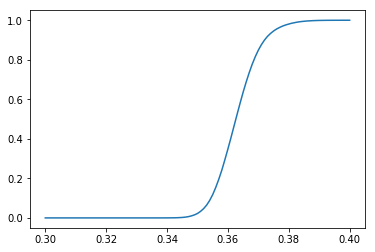

In [15]:
plt.plot(alp,y1)

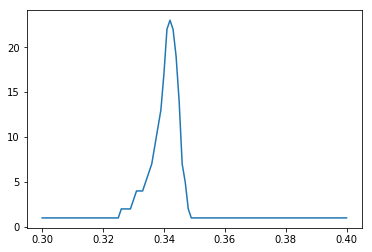

In [16]:
plt.plot(alp,y2)

In [31]:
bb,dens,comp=extract_bb(G,0.34)
print("there are:", len(bb.nodes()), "nodes")
print("there are:", len(bb.edges()), "links")

there are: 52 nodes
there are: 39 links


In [32]:
ww=open("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/cell_lines_corr-0-34.net","w")
ww.write("#SOURCE\t#TARGET\t#WEIGHT\n")
Link_tab=nx.get_edge_attributes(bb,'weight')
for i in bb.edges():
    ww.write(str(i[0]+1)+"\t"+str(i[1]+1)+"\t"+str(Link_tab[i])+"\n")
ww.close()


In [33]:
info=open("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/GIT/cancer_networks/data/cell_info.txt",'r').read()
info=info.split("\n")
info.remove("")
header=info[0].split("\t")[0]+"\t"+info[0].split("\t")[5]+"\t"+info[0].split("\t")[37]#information related to DepMap_ID/Cancer_Type/Gender
info.remove(info[0])
dic={}
for i in info:
    tmp=i.split("\t")
    dic[tmp[0]]=tmp[1:]
ww=open("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/cell_lines_corr-0-34.nodes","w")
ww.write("Node_ID\t"+header+"\n")
for i in sorted(list(bb.nodes())):
    ww.write(str(i+1)+"\t"+Cell[i]+"\t")
    if Cell[i] in dic.keys():
        ww.write(dic[Cell[i]][4]+"\t"+dic[Cell[i]][-1])
        ww.write("\n")
    else:
        for j in header.split("\t"):
            ww.write("\t"+"NA")
        ww.write("\n")
ww.close()

In [ ]:
y